In [1]:
from pyroclastmpm import (
    NoSlipWall,
    SlipWall,
    Gravity,
    NewtonFluid,
    ParticlesContainer,
    NodesContainer,
    USL,
    MUSL,
    LocalGranularRheology,
    CubicShapeFunction,
    set_globals
    
)

import numpy as np
import matplotlib.pyplot as plt



In [2]:


# Material parameters
E = 1e9
pois = 0.3
I0 = 0.279
mu_s = 0.5819
mu_2 = 0.6435

particle_diameter = 0.001
particle_density = 2450  # solid density
rho_c = 1500
rho0 = rho_c

ppc=2

# Define simulation parameters

domain_start = np.array([0,0,0])
domain_end = np.array([1.0, 3.0, 1.4])
cell_size = 0.06

dt = 3e-6

# Define simulation parameters
set_globals(
    dimension=3,
    dt=dt,
    shape_function=CubicShapeFunction,
    output_directory="./output",
)
gravity = 9.8

/home/retief/.cache/pypoetry/virtualenvs/pyroclastmpm-EBADWfgD-py3.10/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


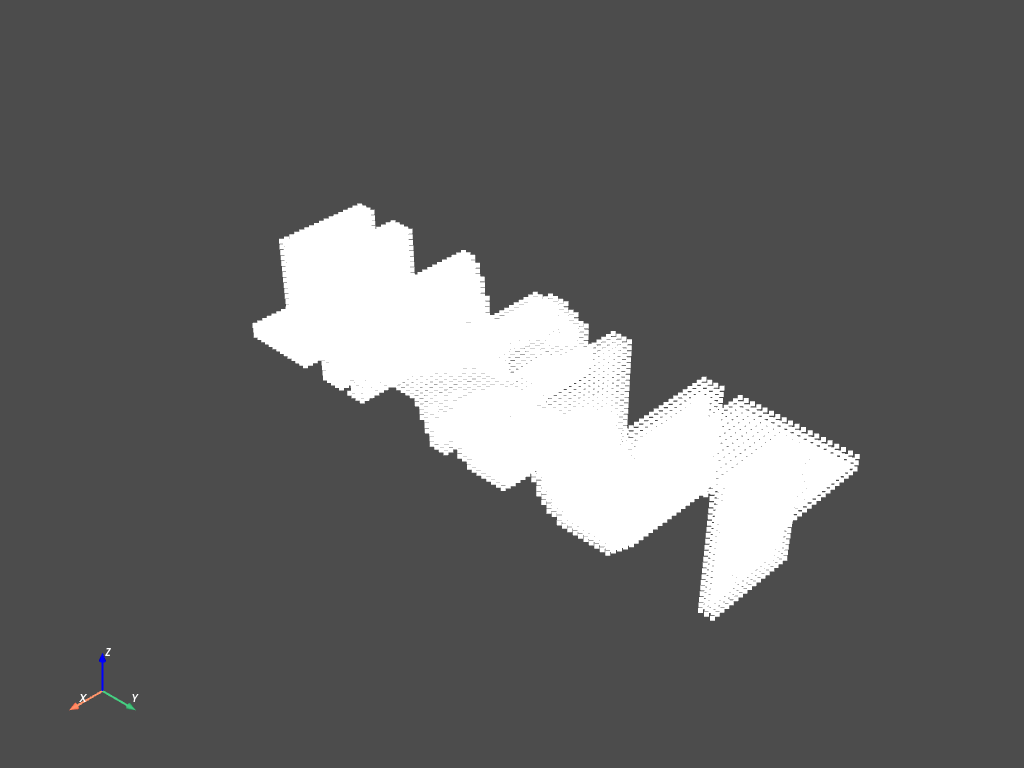

(array([0.25375099, 0.33965397, 0.60685802]),
 array([0.78269899, 3.466808  , 1.29685795]))

In [3]:

import pyvista as pv

mesh = pv.read("TUSAIL2.obj")
cpos = mesh.plot()
points = np.array(mesh.points) + np.array([0.5,3.5,0.0])
np.min(points,axis=0), np.max(points,axis=0)

In [4]:
cs = 0.03

In [5]:
nodes = NodesContainer(
    node_start=domain_start,
    node_end=domain_end,
    node_spacing=cell_size,
)



particle_coords = points
print(f"num_p {len(particle_coords)}, num_c {nodes.num_nodes_total} \n")


num_p 15691, num_c 20808 



In [6]:
vels = np.zeros(particle_coords.shape)

mass = np.ones(len(particle_coords))*rho0*cs*cs*cs*(1./ppc)

volume = np.ones(len(particle_coords))*cs*cs*cs*(1./ppc)

particles = ParticlesContainer(
    positions=particle_coords,
    masses=mass,
    volumes=volume,
    velocities=vels
)


material = LocalGranularRheology(
    E=E,
    pois=pois,
    I0=I0,
    mu_s=mu_s,
    mu_2=mu_2,
    rho_c=rho_c,
    particle_diameter=particle_diameter,
    particle_density=particle_density,
)

particles.materials = [material]

wally0 = SlipWall(wallplane="y0")
wally1 = SlipWall(wallplane="y1")

wallx0 = SlipWall(wallplane="x0")
wallx1 = SlipWall(wallplane="x1")

wallz0 = SlipWall(wallplane="z0")
wallz1 = SlipWall(wallplane="z1")


wallgrav = Gravity(gravity=np.array([0,-40.81,0]))


MPM = USL(
    particles=particles,
    nodes=nodes,
    total_steps=50000,
    output_steps=5000,
    output_start=0,
    boundaryconditions=[wally0,wally1, wallx0, wallx1, wallz0,wallz1,wallgrav],
)

E 1000000000.000000, pois 0.300000, shear 384615392.000000, lame 576923136.000000, I0 0.279000, mu_s 0.581900 EPS 1.123300 


In [7]:

MPM.run()


output: 5000
output: 10000
output: 15000
output: 20000
output: 25000
output: 30000
output: 35000
output: 40000
output: 45000
output: 50000
